## Explore data

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("Iris.csv")
data.head()
# randomly return 3 records
data.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
128,6.4,2.8,5.6,2.1,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor


In [2]:
# change the string variable to integer
data['species']=data['species'].map({'Iris-setosa': 1, 'Iris-virginica': 0, 'Iris-versicolor': 2})
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [3]:
# check for duplicates
data.duplicated().any()
# remove duplicates
data.drop_duplicates(inplace=True)

In [4]:
len(data) # 3 records are duplicated

147

In [5]:
# check number of record for each category of Iris
data['species'].value_counts()

2    50
0    49
1    48
Name: species, dtype: int64

## Define a class

In [24]:
class KNN:
    def __init__(self, k):
        self.k = k
    def fit(self, X, y): # X is a matrix(feature), y is a vector
        # change X into ndarray type
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    def predict(self, X):
        X = np.asarray(X)
        result = []
        # each iteration takes one line in the ndarray (in this case, a point)
        for x in X:
            # [1,2,3]-[4,5,6]=[-3,-3,-3]
            # [1,2,3]-[[4,5,6],[7,8,9]]=[[-3,-3,-3],[-6,-6,-6]] broadcast
            # calculate the distance between test point and each point in the training set
            distance = np.sqrt(np.sum((x-self.X)**2, axis=1))# sum by row
            index = distance.argsort() # return index of element before sorting
            index = index[:self.k]
            count = np.bincount(self.y[index]) # return occurance of each element (non-negative)
            result.append(count.argmax()) # return the index of the max value (in this case, the ele occur most often)
        return np.asarray(result)
    def predict_update(self, X): # take in consider weights (reciprocal of distance)
        X = np.asarray(X)
        result = []
        for x in X:
            distance = np.sqrt(np.sum((x-self.X)**2, axis=1))# sum by row
            index = distance.argsort()
            index = index[:self.k]
            count = np.bincount(self.y[index], weights=1/distance[index]) # sum of weights
            result.append(count.argmax())
        return np.asarray(result)

## Test the function

In [25]:
t0 = data[data['species']==0]
t1 = data[data['species']==1]
t2 = data[data['species']==2]
# shuffle
t0 = t0.sample(len(t0), random_state = 0) # random_state = set.seed()
t1 = t1.sample(len(t1), random_state = 0)
t2 = t2.sample(len(t2), random_state = 0)
# training set
train_X = pd.concat([t0.iloc[:40,:-1], t1.iloc[:40,:-1],t2.iloc[:40,:-1]], axis = 0) # concat by row
train_y = pd.concat([t0.iloc[:40,-1], t1.iloc[:40,-1],t2.iloc[:40,-1]], axis = 0)
# testing set
test_X = pd.concat([t0.iloc[40:,:-1], t1.iloc[40:,:-1],t2.iloc[40:,:-1]], axis = 0)
test_y = pd.concat([t0.iloc[40:,-1], t1.iloc[40:,-1],t2.iloc[40:,-1]], axis = 0)
# create KNN
knn = KNN(3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)
# display(result)
# display(train_y)
display(np.sum(result == test_y)) # number of correct
display(np.sum(result == test_y)/len(result)) # correct rate

26

0.9629629629629629

## Test the updated function

In [28]:
result_update = knn.predict_update(test_X)
display(np.sum(result_update == test_y))

26

## Visualization result

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# # set support chinese display
# mpl.rcParams['font.family'] = 'SimHei'
# # do not use unicode minus
# mpl.rcParams['axes.unicode_minus'] = False

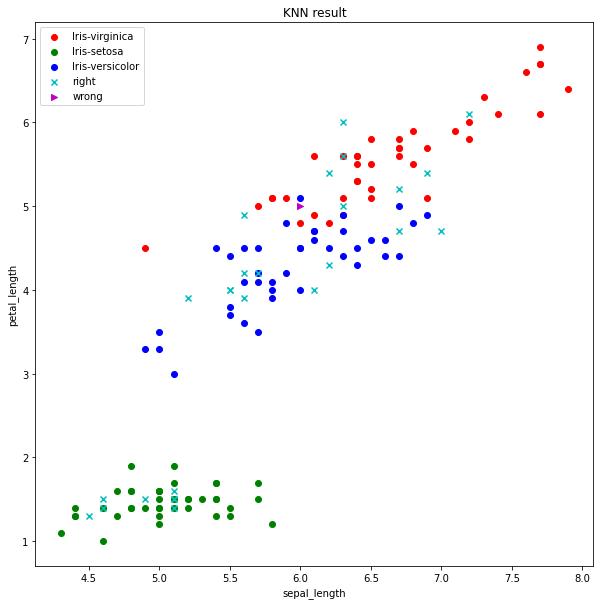

In [19]:
# set plot size
plt.figure(figsize=(10,10))
# plot training set
plt.scatter(t0['sepal_length'][:40], t0['petal_length'][:40], color="r", label='Iris-virginica')
plt.scatter(t1['sepal_length'][:40], t1['petal_length'][:40], color="g", label='Iris-setosa')
plt.scatter(t2['sepal_length'][:40], t2['petal_length'][:40], color="b", label='Iris-versicolor')
# plot testing set
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(right['sepal_length'], right['petal_length'], color="c", marker='x', label='right')
plt.scatter(wrong['sepal_length'], wrong['petal_length'], color="m", marker='>', label='wrong') # triangular
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title("KNN result")
plt.legend()
plt.show()